In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [65]:
with open('data-21.txt', 'r') as file:
    content = file.read()

print(content)
A = content.splitlines()

    0.01     8.4036
    0.03     8.5289
    0.04     8.5908
    0.05     8.6985
    0.07     8.7224
    0.08     8.8667
    0.09     8.9050
    0.11     9.0293
    0.12     9.1406
    0.13     9.1957
    0.15     9.3310
    0.16     9.4345
    0.17     9.5152
    0.19     9.6381
    0.20     9.7421
    0.21     9.8697
    0.23     9.9798
    0.24    10.0344
    0.25    10.1508
    0.27    10.2850
    0.28    10.3852
    0.29    10.4737
    0.31    10.5987
    0.32    10.7176
    0.33    10.9199
    0.35    10.9765
    0.36    11.1153
    0.37    11.2144
    0.39    11.3673
    0.40    11.4957
    0.41    11.6675
    0.43    11.7576
    0.44    11.9449
    0.45    12.0506
    0.47    12.2335
    0.48    12.3129
    0.49    12.4950
    0.51    12.6191
    0.52    12.7703
    0.53    12.9467
    0.55    13.1468
    0.56    13.2562
    0.57    13.4075
    0.59    13.5828
    0.60    13.7512
    0.61    13.9487
    0.63    14.1078
    0.64    14.2864
    0.65    14.4849
    0.67    14.6396


In [120]:
B = []
for i in range(len(A)):
    B.append(A[i].split("   "))
data = pd.DataFrame(B).drop(0, axis = 1)
data.columns = ['t', 'y(t)']
data = data.apply(pd.to_numeric)
data.dropna()
n = len(data)
print(data)
x = data['t']
y = data['y(t)']
print("mean of y(t):", np.mean(y))

       t     y(t)
0   0.01   8.4036
1   0.03   8.5289
2   0.04   8.5908
3   0.05   8.6985
4   0.07   8.7224
..   ...      ...
70  0.95  19.3245
71  0.96  19.5743
72  0.97  19.9263
73  0.99  20.1586
74  1.00  20.4232

[75 rows x 2 columns]
mean of y(t): 13.242671999999999


In [76]:
one = [1] * n
X = np.column_stack((one, x, x**2, x**3, x**4))
XtX = X.T @ X
XtX_inv = np.linalg.inv(XtX)
beta = (XtX_inv)@(X.T @y)
y3 = X@beta
print(beta)
print(sum((y3 - y)**2/n))

[8.33269021 6.22921002 3.44120743 1.66757847 0.75159687]
0.0022534387804778286


Estimated parameters for Model 1 (Differential Evolution): [ 0.          7.31538066  1.          0.93744996 -1.        ]
Residual Sum of Squares for Model 1 (Differential Evolution): 0.4955146940168927


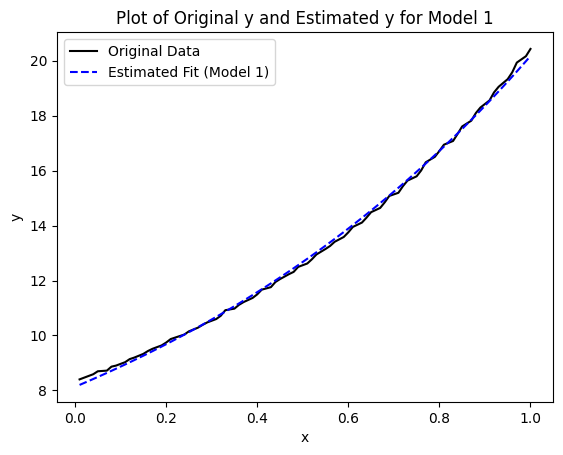

In [111]:
import numpy as np

def model1(t, alpha0, alpha1, beta1, alpha2, beta2):
    return alpha0 + alpha1 * np.exp(beta1 * t) + alpha2 * np.exp(beta2 * t)

def objective(params, x, y):
    alpha0, alpha1, beta1, alpha2, beta2 = params
    y_pred = model1(x, alpha0, alpha1, beta1, alpha2, beta2)
    return np.sum((y - y_pred) ** 2)

def differential_evolution(objective, bounds, x, y, pop_size=20, max_gen=100, F=0.8, CR=0.9):
    population = np.array([np.random.uniform(low, high, pop_size) for low, high in bounds]).T
    num_params = population.shape[1]
    best_idx = np.argmin([objective(ind, x, y) for ind in population])
    best_solution = population[best_idx]
    best_score = objective(best_solution, x, y)
    for gen in range(max_gen):
        new_population = np.copy(population)
        for i in range(pop_size):
            indices = list(range(pop_size))
            indices.remove(i)
            a, b, c = population[np.random.choice(indices, 3, replace=False)]
            mutant = a + F * (b - c)
            mutant = np.clip(mutant, [b[0] for b in bounds], [b[1] for b in bounds])
            cross_points = np.random.rand(num_params) < CR
            if not np.any(cross_points):
                cross_points[np.random.randint(0, num_params)] = True
            trial = np.where(cross_points, mutant, population[i])
            if objective(trial, x, y) < objective(population[i], x, y):
                new_population[i] = trial
        population = new_population
        best_idx = np.argmin([objective(ind, x, y) for ind in population])
        best_solution = population[best_idx]
        best_score = objective(best_solution, x, y)
    return best_solution, best_score

bounds = [(0, 20), (0, 10), (-1, 1), (0, 10), (-1, 1)]
best_params, best_rss = differential_evolution(objective, bounds, x, y, pop_size=20, max_gen=100)
print("Estimated parameters for Model 1 (Differential Evolution):", best_params)
print("Residual Sum of Squares for Model 1 (Differential Evolution):", best_rss)

plt.plot(x, y, label='Original Data', color='black')
plt.plot(x, y1, label='Estimated Fit (Model 1)', linestyle='--', color='blue')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of Original y and Estimated y for Model 1')
plt.legend()
plt.show()


### Model 1

In [ ]:
def model1(t, alpha0, alpha1, beta1, alpha2, beta2):
    return alpha0 + alpha1 * np.exp(beta1 * t) + alpha2 * np.exp(beta2 * t)

def jacobian_model1(t, alpha0, alpha1, beta1, alpha2, beta2):
    J = np.zeros((len(t), 5))
    exp_beta1_t = np.exp(beta1 * t)
    exp_beta2_t = np.exp(beta2 * t)
    J[:, 0] = 1
    J[:, 1] = exp_beta1_t
    J[:, 2] = alpha1 * t * exp_beta1_t
    J[:, 3] = exp_beta2_t
    J[:, 4] = alpha2 * t * exp_beta2_t
    return J

def objective_function(y, t, params):
    residuals = y - model1(t, *params)
    return np.sum(residuals ** 2) / len(y)

def taylor_expansion_least_squares(y, t, initial_params, tol=1e-5, max_iter=100):
    params = np.array(initial_params, dtype=float)
    for i in range(max_iter):
        residuals = y - model1(t, *params)
        J = jacobian_model1(t, *params)
        gradient = -J.T @ residuals
        hessian_approx = J.T @ J
        delta = np.linalg.pinv(hessian_approx) @ gradient
        
        new_params = params + delta
        rss_current = objective_function(y, t, params)
        rss_new = objective_function(y, t, new_params)
        
        lambda_factor = 1.0
        while rss_new > rss_current and lambda_factor > 1e-4:
            lambda_factor *= 0.5
            new_params = params + lambda_factor * delta
            rss_new = objective_function(y, t, new_params)
        
        params = new_params
        rss = rss_new
        print(f"Iteration {i+1}: RSS/N = {rss}, ||delta|| = {np.linalg.norm(delta)}, lambda = {lambda_factor}")

        if np.linalg.norm(delta) < tol:
            print(f"Converged after {i+1} iterations with RSS/N = {rss:.5f}")
            break

    return params

initial_params_model1 = [8, 1, -0.01, 1, -0.01]
params_model1 = taylor_expansion_least_squares(y, x, initial_params_model1)
print("Estimated parameters for Model 1:", params_model1)
y1 = model1(x, *params_model1)
rss = objective_function(y, x, params_model1)
print("Residual Sum of Squares per Observation for Model 1:", rss)

Iteration 1: RSS/N = 2.2148623472211786, ||delta|| = 181562.33601210342, lambda = 0.000244140625
Iteration 2: RSS/N = 2.215133811890846, ||delta|| = 497.5689327090544, lambda = 6.103515625e-05
Iteration 3: RSS/N = 2.215405312123243, ||delta|| = 498.27536088038113, lambda = 6.103515625e-05
Iteration 4: RSS/N = 2.2156768474810495, ||delta|| = 498.98327155027835, lambda = 6.103515625e-05
Iteration 5: RSS/N = 0.8820461428845677, ||delta|| = 499.6511135205569, lambda = 0.125
Iteration 6: RSS/N = 0.8821538348331789, ||delta|| = 257.377100423474, lambda = 6.103515625e-05
Iteration 7: RSS/N = 0.8822615400309373, ||delta|| = 257.43667986454733, lambda = 6.103515625e-05
Iteration 8: RSS/N = 0.8823692584723273, ||delta|| = 257.49153878464296, lambda = 6.103515625e-05
Iteration 9: RSS/N = 0.8824769902158155, ||delta|| = 257.580073114407, lambda = 6.103515625e-05
Iteration 10: RSS/N = 0.882584735192045, ||delta|| = 257.63560869855877, lambda = 6.103515625e-05
Iteration 11: RSS/N = 0.882692493451360

### Model 2

In [ ]:
def model2(t, alpha0, alpha1, beta0, beta1):
    return (alpha0 + alpha1 * t) / (beta0 + beta1 * t)

def jacobian_model2(t, alpha0, alpha1, beta0, beta1):
    J = np.zeros((len(t), 4))
    J[:, 0] = 1 / (beta0 + beta1 * t)
    J[:, 1] = t / (beta0 + beta1 * t)
    J[:, 2] = -(alpha0 + alpha1 * t) / (beta0 + beta1 * t) ** 2
    J[:, 3] = -t * (alpha0 + alpha1 * t) / (beta0 + beta1 * t) ** 2
    return J

def gauss_newton_model2(y, t, initial_params, tol=1e-10, max_iter=1000):
    params = np.array(initial_params, dtype=float)
    for i in range(max_iter):
        residuals = y - model2(t, *params)
        J = jacobian_model2(t, *params)
        delta = np.linalg.pinv(J.T @ J) @ J.T @ residuals
        params += delta
        rss_n = np.sum((residuals) ** 2) / len(y)
        print(f"Iteration {i+1}: RSS/N = {rss_n}, ||delta|| = {np.linalg.norm(delta)}")
        if np.linalg.norm(delta) < tol:
            print(f"Model 2 converged after {i+1} iterations")
            break
    return params

initial_params_model2 = [1, 1, 2, 1]

params_model2 = gauss_newton_model2(y, x, initial_params_model2)
print("Estimated parameters for Model 2:", params_model2)
y2 = model2(x, params_model2[0], params_model2[1], params_model2[2], params_model2[3])
rss_per_obs = np.sum((y2 - y) ** 2) / len(y)
print("Residual Sum of Squares per Observation for Model 2:", rss_per_obs)


Iteration 1: RSS/N = 171.67954083557473, ||delta|| = 210.070504076643
Iteration 2: RSS/N = 222.26351962564794, ||delta|| = 2282.4358891798797
Iteration 3: RSS/N = 362.2298440006318, ||delta|| = 3199.711283845555
Iteration 4: RSS/N = 247.76879629260986, ||delta|| = 47453.25195371331
Iteration 5: RSS/N = 163.84785132090622, ||delta|| = 80771.50451892549
Iteration 6: RSS/N = 285.53447617855784, ||delta|| = 470812.8401872585
Iteration 7: RSS/N = 220.53794116698162, ||delta|| = 4991834.058045989
Iteration 8: RSS/N = 344.2937110490559, ||delta|| = 8773451.389240645
Iteration 9: RSS/N = 242.46957251813984, ||delta|| = 129762719.68845844
Iteration 10: RSS/N = 125.60734358271115, ||delta|| = 79750275.11925486
Iteration 11: RSS/N = 365.6522978335872, ||delta|| = 205742567.6127596
Iteration 12: RSS/N = 248.9101664247491, ||delta|| = 3045858758.5580134
Iteration 13: RSS/N = 168.08265484712203, ||delta|| = 5845882812.911586
Iteration 14: RSS/N = 282.97138931560266, ||delta|| = 35420265689.02784
Ite

### Original vs estimates plot

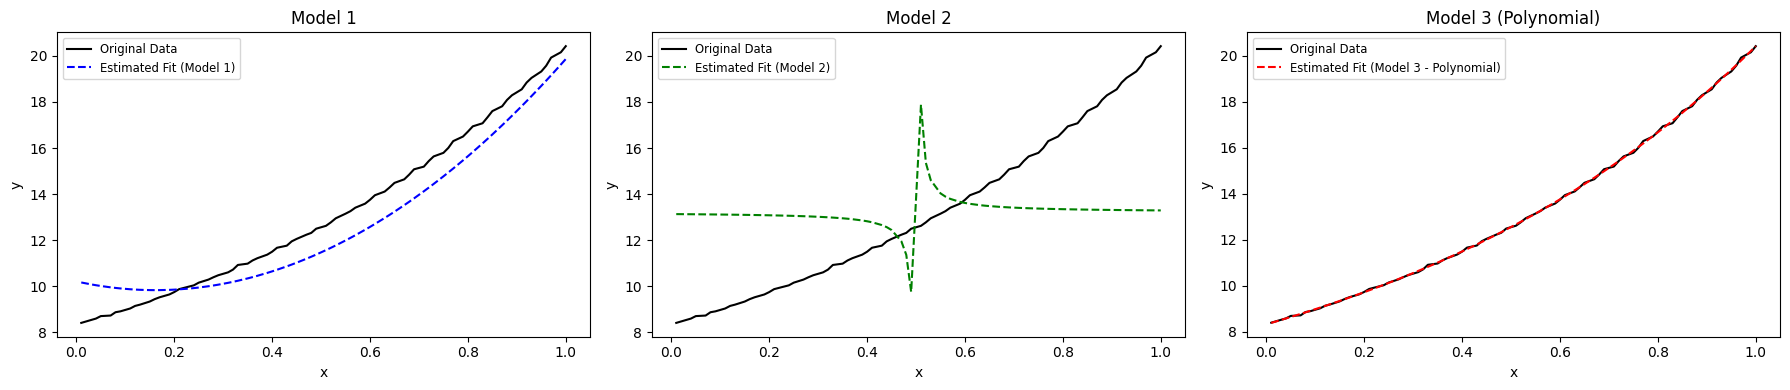

In [144]:
one = [1] * len(x)
X = np.column_stack((one, x, x**2, x**3, x**4))
XtX = X.T @ X
XtX_inv = np.linalg.inv(XtX)
beta = XtX_inv @ (X.T @ y)  # Coefficients for the polynomial regression model
y3 = X @ beta  # Estimated y values for the third model
params_model3 = beta

# Create a figure with subplots in a single row for each model
plt.figure(figsize=(18, 4))

# Plot for Model 1
plt.subplot(1, 3, 1)
plt.plot(x, y, label='Original Data', color='black')
plt.plot(x, y1, label='Estimated Fit (Model 1)', linestyle='--', color='blue')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Model 1')
plt.legend(fontsize='small')

# Plot for Model 2
plt.subplot(1, 3, 2)
plt.plot(x, y, label='Original Data', color='black')
plt.plot(x, y2, label='Estimated Fit (Model 2)', linestyle='--', color='green')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Model 2')
plt.legend(fontsize='small')

# Plot for Model 3 (Polynomial Regression)
plt.subplot(1, 3, 3)
plt.plot(x, y, label='Original Data', color='black')
plt.plot(x, y3, label='Estimated Fit (Model 3 - Polynomial)', linestyle='--', color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Model 3 (Polynomial)')
plt.legend(fontsize='small')

# Adjust layout and display the plots
plt.tight_layout()
plt.show()



In [142]:
print(sum((y1 - y)**2/n))
print(sum((y2 - y)**2/n))

0.8923363272557115
11.842851100290236


Residual plots

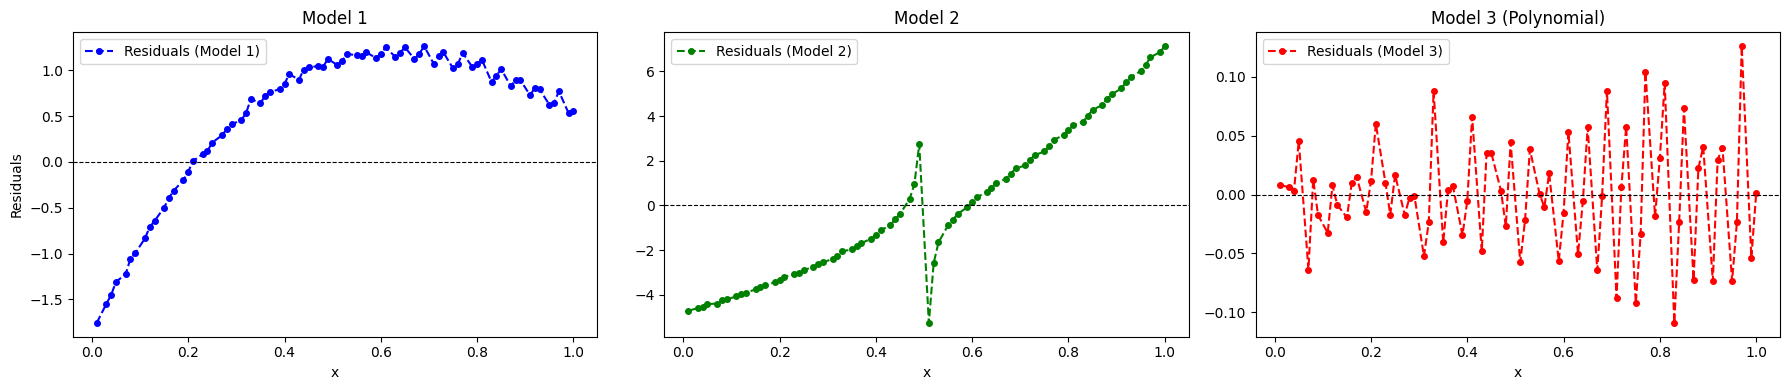

In [147]:
import matplotlib.pyplot as plt

residuals_model1 = y - y1
residuals_model2 = y - y2
residuals_model3 = y - y3
# --- Residual Plots in a Single Row ---
plt.figure(figsize=(18, 4))

# Residual plot for Model 1
plt.subplot(1, 3, 1)
plt.plot(x, residuals_model1, label='Residuals (Model 1)', linestyle='--', marker='o', color='b', markersize=4)
plt.axhline(0, color='k', linestyle='--', linewidth=0.8)
plt.xlabel('x')
plt.ylabel('Residuals')
plt.title('Model 1')
plt.legend()

# Residual plot for Model 2
plt.subplot(1, 3, 2)
plt.plot(x, residuals_model2, label='Residuals (Model 2)', linestyle='--', marker='o', color='g', markersize=4)
plt.axhline(0, color='k', linestyle='--', linewidth=0.8)
plt.xlabel('x')
plt.title('Model 2')
plt.legend()

# Residual plot for Model 3 (Polynomial Regression Model)
plt.subplot(1, 3, 3)
plt.plot(x, residuals_model3, label='Residuals (Model 3)', linestyle='--', marker='o', color='r', markersize=4)
plt.axhline(0, color='k', linestyle='--', linewidth=0.8)
plt.xlabel('x')
plt.title('Model 3 (Polynomial)')
plt.legend()

# Adjust layout to prevent overlap and display plots
plt.tight_layout()
plt.show()


In [139]:
# Calculate RSS/N for each model
rss_model1 = np.sum((y - y1) ** 2) / len(y)
rss_model2 = np.sum((y - y2) ** 2) / len(y)
rss_model3 = np.sum((y - y3) ** 2) / len(y)

# Print RSS/N values for comparison
print(f"RSS/N for Model 1: {rss_model1}")
print(f"RSS/N for Model 2: {rss_model2}")
print(f"RSS/N for Model 3: {rss_model3}")

# Determine the best model based on lowest RSS/N
if rss_model1 < rss_model2 and rss_model1 < rss_model3:
    best_model = "Model 1"
    best_rss = rss_model1
elif rss_model2 < rss_model1 and rss_model2 < rss_model3:
    best_model = "Model 2"
    best_rss = rss_model2
else:
    best_model = "Model 3"
    best_rss = rss_model3

print(f"The best-fitted model is {best_model} with RSS/N = {best_rss}")


RSS/N for Model 1: 0.8923363272557117
RSS/N for Model 2: 11.842851100290236
RSS/N for Model 3: 0.002253438780477828
The best-fitted model is Model 3 with RSS/N = 0.002253438780477828


In [148]:
from scipy.stats import norm

def calculate_sigma_squared(y, y_pred, num_params):
    residuals = y - y_pred
    rss = np.sum(residuals ** 2)
    return rss / (len(y) - num_params)

def fisher_information_matrix(J, sigma_squared):
    return np.linalg.pinv(J.T @ J) / sigma_squared

def confidence_intervals(params, variance_matrix, confidence_level=0.95):
    z_score = norm.ppf(0.5 + confidence_level / 2)
    standard_errors = np.sqrt(np.diag(variance_matrix))
    lower_bounds = params - z_score * standard_errors
    upper_bounds = params + z_score * standard_errors
    return lower_bounds, upper_bounds

# For Model 1
J1 = jacobian_model1(x, *params_model1)
sigma_squared_1 = calculate_sigma_squared(y, model1(x, *params_model1), len(params_model1))
variance_matrix_1 = fisher_information_matrix(J1, sigma_squared_1)
lower_bounds_1, upper_bounds_1 = confidence_intervals(params_model1, variance_matrix_1)
print("Model 1:")
print("Sigma^2:", sigma_squared_1)
print("Confidence intervals:", list(zip(lower_bounds_1, upper_bounds_1)))

# For Model 2
J2 = jacobian_model2(x, *params_model2)
sigma_squared_2 = calculate_sigma_squared(y, model2(x, *params_model2), len(params_model2))
variance_matrix_2 = fisher_information_matrix(J2, sigma_squared_2)
lower_bounds_2, upper_bounds_2 = confidence_intervals(params_model2, variance_matrix_2)
print("\nModel 2:")
print("Sigma^2:", sigma_squared_2)
print("Confidence intervals:", list(zip(lower_bounds_2, upper_bounds_2)))

# For Model 3
J3 = np.column_stack((np.ones_like(x), x, x**2, x**3, x**4))
sigma_squared_3 = calculate_sigma_squared(y, y3, J3.shape[1])
variance_matrix_3 = fisher_information_matrix(J3, sigma_squared_3)
lower_bounds_3, upper_bounds_3 = confidence_intervals(params_model3, variance_matrix_3)
print("\nModel 3 (Polynomial):")
print("Sigma^2:", sigma_squared_3)
print("Confidence intervals:", list(zip(lower_bounds_3, upper_bounds_3)))


Model 1:
Sigma^2: 0.9560746363454053
Confidence intervals: [(-11486.437957861697, 11325.60264141599), (-5646.764233679146, 5737.576187480389), (-29.150447262333692, 30.180287351447348), (-5669.607410943807, 5760.040132782804), (-44.444005707032865, 43.201641668840686)]

Model 2:
Sigma^2: 12.510053979179826
Confidence intervals: [(4949524090287.913, 4966288137390.661), (-9950347693040.775, -9941836408230.975), (375531197056.637, 379678521440.86383), (-756646475995.0845, -749291145772.2029)]

Model 3 (Polynomial):
Sigma^2: 0.0024143986933691016
Confidence intervals: [(-16.501063960107082, 33.16644437131128), (-328.36426508486903, 340.82268511662863), (-1327.2981244985135, 1334.1805393664604), (-1965.8063241732982, 1969.1414811041025), (-962.7588170375985, 964.2620107840827)]


Model 1 - Shapiro-Wilk Test p-value: 0.0000
Model 1 residuals do not follow a normal distribution.


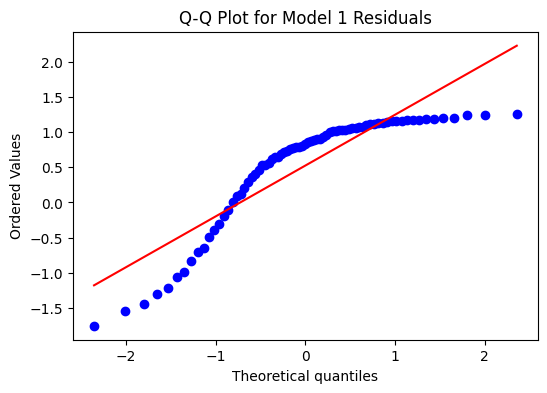

Model 2 - Shapiro-Wilk Test p-value: 0.0023
Model 2 residuals do not follow a normal distribution.


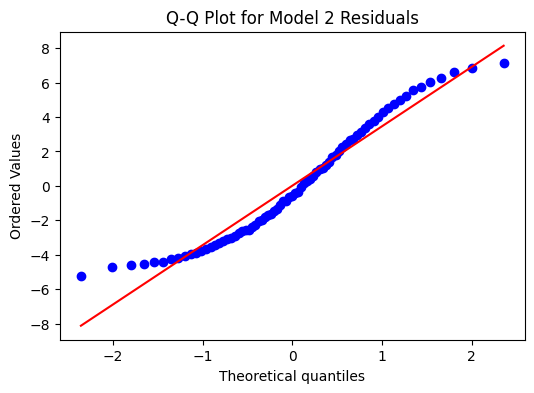

Model 3 (Polynomial Regression) - Shapiro-Wilk Test p-value: 0.8333
Model 3 (Polynomial Regression) residuals likely follow a normal distribution.


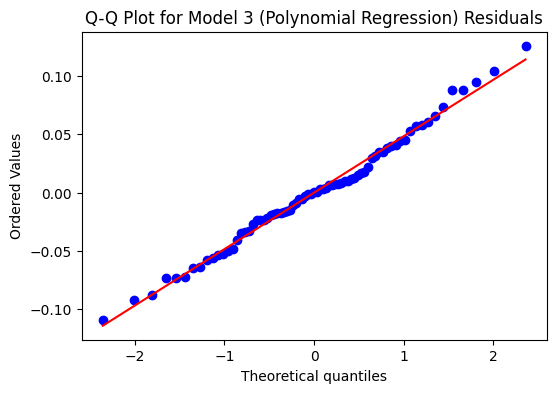

In [149]:
from scipy.stats import shapiro, probplot

# Assuming residuals_model1, residuals_model2, and residuals_model3 are already defined

# Function to test normality using Shapiro-Wilk test and Q-Q Plot
def normality_test(residuals, model_name):
    # Shapiro-Wilk test
    stat, p_value = shapiro(residuals)
    print(f"{model_name} - Shapiro-Wilk Test p-value: {p_value:.4f}")
    if p_value > 0.05:
        print(f"{model_name} residuals likely follow a normal distribution.")
    else:
        print(f"{model_name} residuals do not follow a normal distribution.")

    # Q-Q Plot
    plt.figure(figsize=(6, 4))
    probplot(residuals, dist="norm", plot=plt)
    plt.title(f"Q-Q Plot for {model_name} Residuals")
    plt.show()

# Perform normality tests for each model
normality_test(residuals_model1, "Model 1")
normality_test(residuals_model2, "Model 2")
normality_test(residuals_model3, "Model 3 (Polynomial Regression)")
